### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tunescan_flatvh_75_180_1500_lower_chroma_neg_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 qx     qy                          
lhcb1 -60.0    -60.0    62.305 60.309      base_collider   
                               60.310      base_collider   
                               60.311      base_collider   
                               60.312      base_collider   
                               60.313      base_collider   
...                                                  ...   
                        62.323 60.328      base_collider   
                               60.329      base_collider   
                        62.324 60.328      base_collider   
                               60.329      base_collider   
                        62.325 60.329      base_collider   

                                       normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 qx     qy                                         
lhcb1 -60.0    -60.0    62.305 60.309                             3.310   
                               60.310                             3.310   
                               60.311                             3.310   
                               60.312                             3.379   
                               60.313                             3.586   
...                                                                 ...   
                        62.323 60.328                             6.276   
                               60.329                             5.310   
                        62.324 60.328                             6.276   
                               60.329                             5.448   
                        62.325 60.329                             5.448   

                                           qx      qy  dqx  dqy  i_bunch_b1  \
beam  i_oct_b1 i_oct_b2 qx     qy                                             
lhcb1 -60.0    -60.0    62.305 60.309  62.305  60.309  5.0  5.0         NaN   
                               60.310  62.305  60.310  5.0  5.0         NaN   
                               60.311  62.305  60.311  5.0  5.0         NaN   
                               60.312  62.305  60.312  5.0  5.0         NaN   
                               60.313  62.305  60.313  5.0  5.0         NaN   
...                                       ...     ...  ...  ...         ...   
                        62.323 60.328  62.323  60.328  5.0  5.0         NaN   
                               60.329  62.323  60.329  5.0  5.0         NaN   
                        62.324 60.328  62.324  60.328  5.0  5.0         NaN   
                               60.329  62.324  60.329  5.0  5.0         NaN   
                        62.325 60.329  62.325  60.329  5.0  5.0         NaN   

                                       i_bunch_b2  i_oct_b1  i_oct_b2  \
beam  i_oct_b1 i_oct_b2 qx     qy                                       
lhcb1 -60.0    -60.0    62.305 60.309         NaN     -60.0     -60.0   
                               60.310         NaN     -60.0     -60.0   
                               60.311         NaN     -60.0     -60.0   
                               60.312         NaN     -60.0     -60.0   
                               60.313         NaN     -60.0     -60.0   
...                                           ...       ...       ...   
                        62.323 60.328         NaN     -60.0     -60.0   
                               60.329         NaN     -60.0     -60.0   
                        62.324 60.328         NaN     -60.0     -60.0   
                               60.329         NaN     -60.0     -60.0   
                        62.325 60.329         NaN     -60.0     -60.0   

                                       num_particles_per_bunch  crossing_angle  
beam  i_oct_b1 i_oct_b2 qx     qy                                               
lhcb1 -60.0    -60.0    62.305 60.309             1.400000e+11           250.0  
                               60.310             1.400000e+

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,3.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,3.310,3.586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,3.310,3.862,3.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,3.379,3.793,4.069,6.069,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,3.586,3.448,4.276,6.207,5.931,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,3.103,3.862,4.552,5.931,6.138,5.517,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,3.586,3.793,5.931,6.552,6.414,5.931,5.448,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,3.931,4.276,6.138,6.207,6.345,5.586,4.966,5.448,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.207,4.138,5.586,6.000,6.483,5.862,5.103,5.310,5.517,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Replace NaNs above the upper diagonal with 8
for qx in df_to_plot.columns:
    for qy in df_to_plot.index:
        if qy >= qx - 2 + 0.004:
            if pd.isna(df_to_plot.loc[qy, qx]):
                df_to_plot.loc[qy, qx] = 8

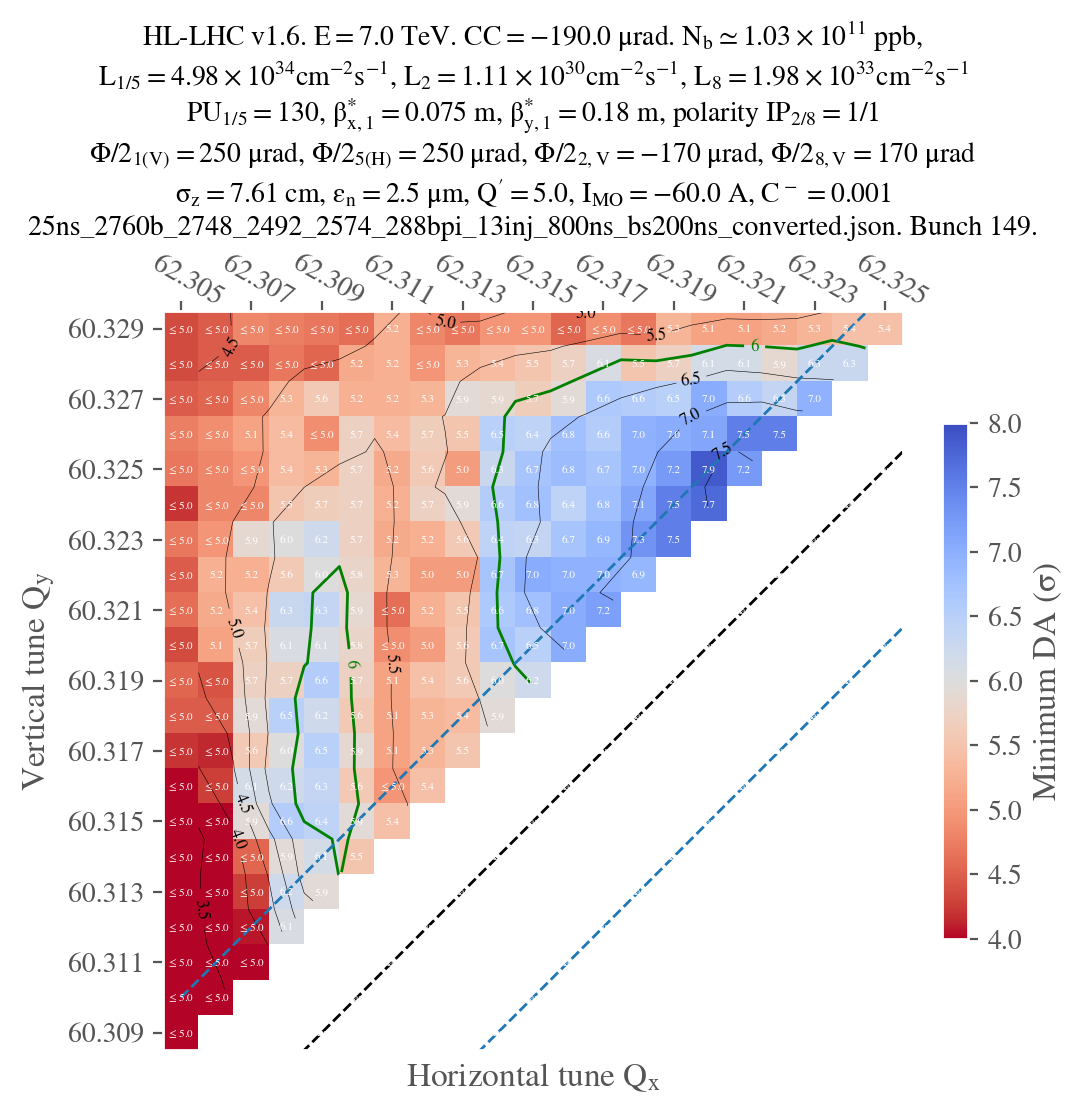

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.075,
    bety=0.18,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified
